# Analyzing the traffic indicators on I-94 #

We will analyze the cause of the traffic indicators of the I-94 using the Data from UCI Machine Learning Repository. 

The goal is to show what may cuased the traffic. We will be only analyzing the werstbound of traffic. 

In [45]:
import pandas as pd

In [46]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [47]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [48]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [49]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

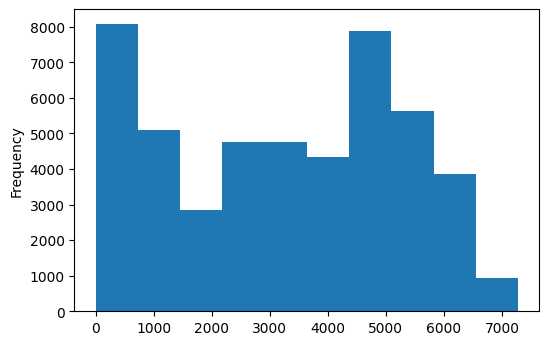

In [51]:
traffic['traffic_volume'].plot.hist()

In [52]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the traffic volume histogram, we can see that the max is 7,280 and min is 0. The most traffic vloume lays in between 4,500 and 5,000. 

The time of the day defintely affact the traffic volume. Let's analyse the day and night volume.

## Day and Night Traffic Valume ##

We decide to sepertate the day and night by the following rule. 

- Day: from 7am to 7pm
- Night: from 7pm to 7am

In [53]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic[(traffic['date_time'].dt.hour >= 7) 
        & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night =traffic[(traffic['date_time'].dt.hour < 7) 
        | (traffic['date_time'].dt.hour >= 19)]
print(night.shape)

print(traffic.shape)

(23877, 9)
(24327, 9)
(48204, 9)


Notice that night time has more data that day time due to some daytime data lost.

## Day and Night Compare ##
Now we want to see the different traffic volume compared by histogram side by side. 

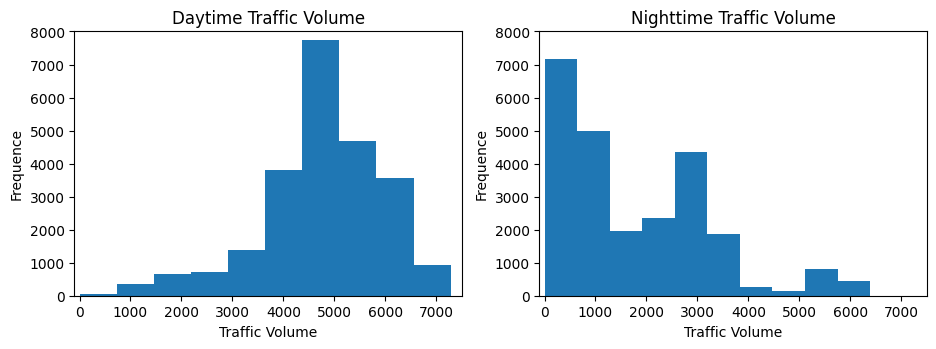

In [54]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Daytime Traffic Volume')
plt.ylabel('Frequence')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Nighttime Traffic Volume')
plt.ylabel('Frequence')
plt.xlabel('Traffic Volume')

plt.show()

In [55]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [56]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time.

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

We will be focuing on the day time data for anaylzing the trafiic jam conditions. 

## Time Series Analysis ##

Now we want to see if the traffic has anything to do with the month, day of week and time of the day. 

<ipython-input-57-fe2551350c82>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



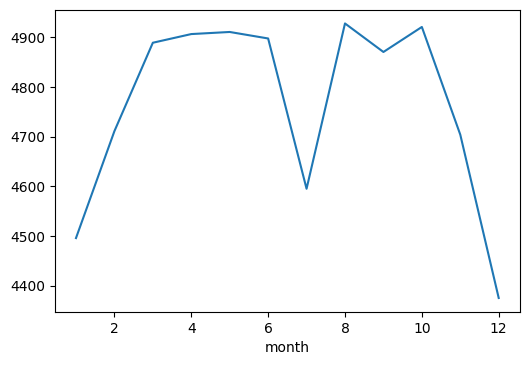

In [57]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

We see that July has an unusual dip in the traffice volume which is not very common. 

Let's do a deep dive in the July data for a closer look. Specifically, we want to see how the data vary by year. 

<ipython-input-58-4fadc317c1f7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



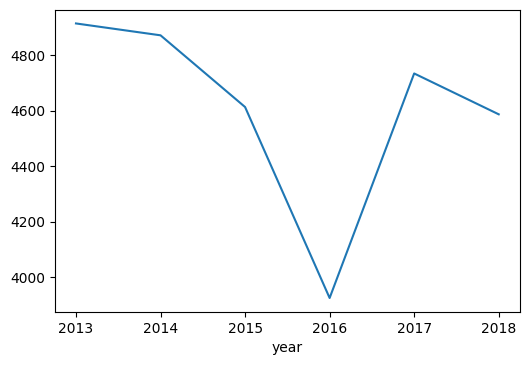

In [58]:
day['year'] = day['date_time'].dt.year
by_year_july = day[day['month'] == 7].groupby('year').mean()
by_year_july['traffic_volume'].plot.line()
plt.show()

We can see that the dip happended in 2016 due to the contstruction.

## Time Analysis by day of week ##

Supposedly week day we should see more of traffic than weekend. 

<ipython-input-59-408736791903>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



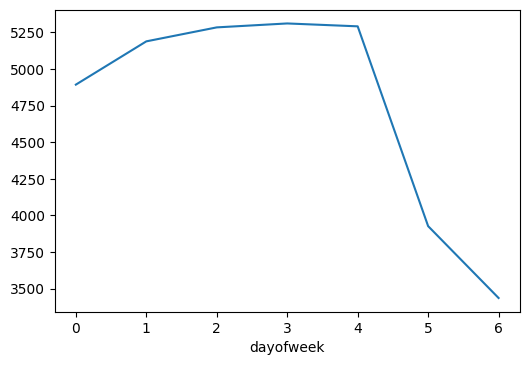

In [59]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()  # 0 is Monday, 6 is Sunday
plt.show()

## Time Analysis by Hour ##
Now we want to see how the hour of the day is affacting traffic volume.  

<ipython-input-60-efc53c4344fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Traffic Volume by Day: Sat - Sun')

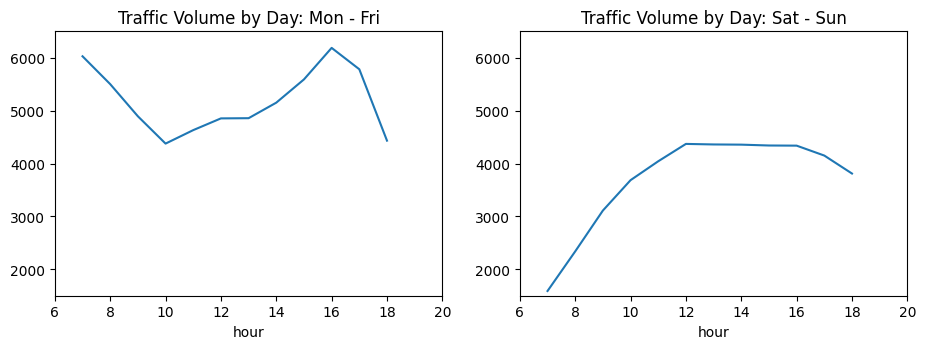

In [60]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11, 3.5))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume by Day: Mon - Fri')


plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume by Day: Sat - Sun')

From the graphs above, we can reach the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

- The traffic is usually heavier on business days compared to weekends.

- On business days, the rush hours are around 7 and 16.

## Weather Indicator ##
Now we want to see how weather affacts the traffic volume.

In [62]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [73]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that temperature has the stongest corrlation with traffic volume. Now let's plot a scatter graph for better visulization.

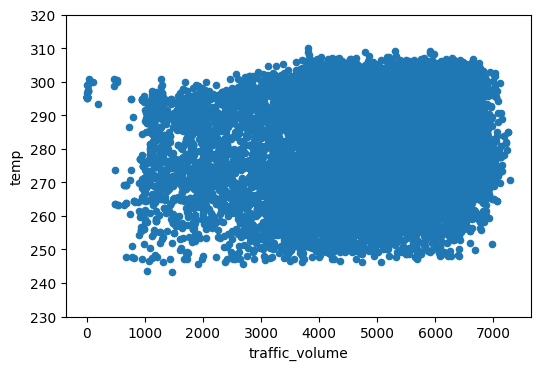

In [71]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # The two 0K dots messed up the y-axis.
plt.show()

Now we can say that the temperature doesn't look like a major affactor to the traffic volume now. The high correlation value may due to the 0K dots.

## Other Weather Factors

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [76]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

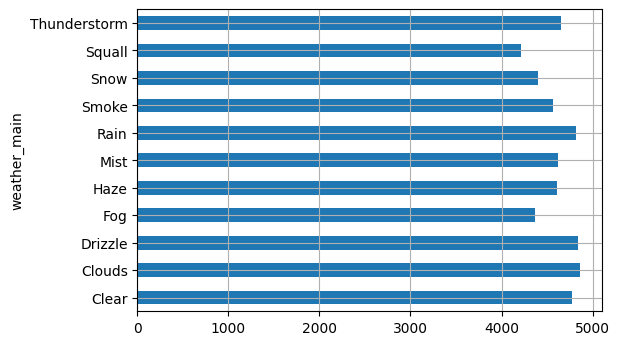

In [88]:
by_weather_main['traffic_volume'].plot.barh(grid=True)
plt.show()

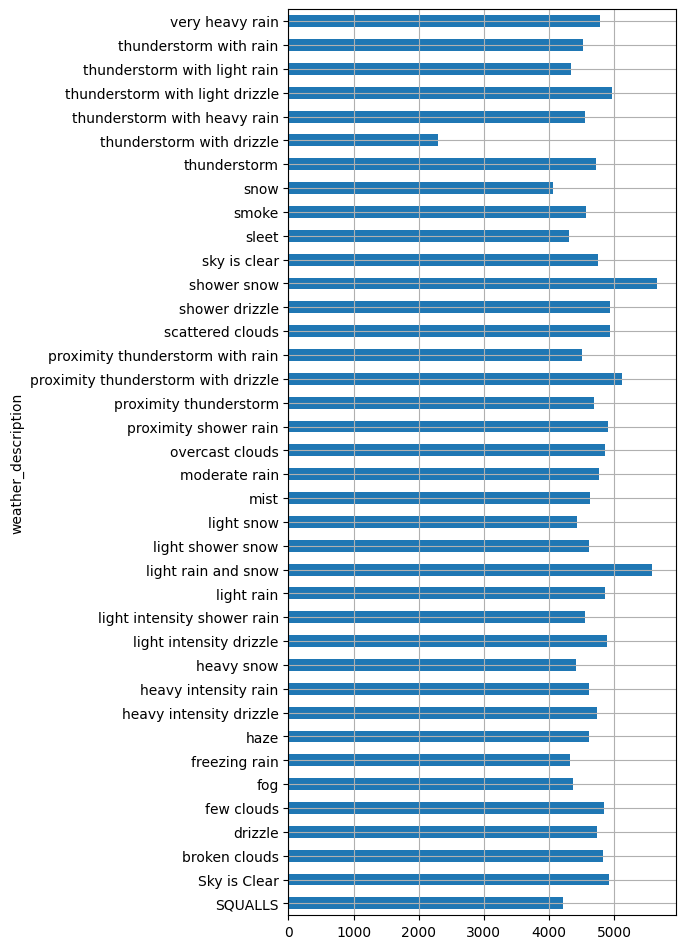

In [89]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,12), grid=True)

From the last graphs, we can see that light rain and snow are most likely contibuting to the heavy traffic. 

## Conclusion

In this project, we tried to find a few factors of the heavy traffic condition on the I-94. We managed to find two types of indicators:

- Time and date indicators 

 - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

 - The traffic is usually heavier on weekdays compared to the weekends.

 - On weekdays, the rush hours are around 7 and 16.

- Weather indicators 

 - Shower snow
 - Light rain and snow
